<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/Copy_of_un_supervised_cs_shaliha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/adult_dataset.csv')

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [ ]:
df.duplicated().sum()

np.int64(16)

In [ ]:
df = df.drop_duplicates()

In [ ]:
for i in df.columns:
   a = df[i].unique()
   print(f"{i}= {a}")

age= [ 39.  50.  38.  53.  28.  37.  49.  52.  31.  42.  30.  23.  32.  40.
  34.  25.  nan  54.  35.  43.  59.  56.  19.  20.  45.  22.  48.  21.
  24.  57.  44.  41.  29.  18.  47.  46.  79.  27.  67.  33.  76.  17.
 120.  36.  55.  61.  70.  64.  71.  68.  66.  51.  58.  26.  60.  90.
  75.  65.  77.  62.  63.  80.  74.  72.  69.  73.  81.  88. 250.  78.
  82.  83. 255.  84.  85. 225. 230.  86.  87.  89. 140. 100. 210.]
workclass= ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' nan 'Local-gov'
 '?' 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt= [ 77516  83311 215646 ... 173449  89686 350977]
education= ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num= [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status= ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occu

In [ ]:
df['fnlwgt'].nunique()

28523

In [ ]:
df = df.replace('?',np.nan)

In [ ]:
df.isnull().sum()

,0
age,2442
workclass,5125
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

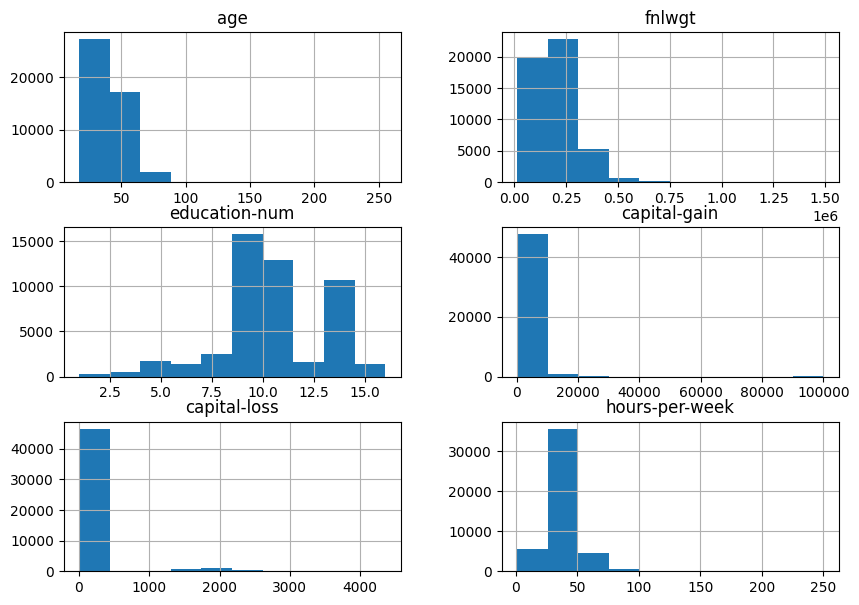

In [ ]:
df.hist(figsize=(10,7))

In [ ]:
df[df['occupation']=='Armed-Forces']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
442,24.0,Federal-gov,191073,HS-grad,9,Never-married,Armed-Forces,Own-child,White,Male,0,0,40.0,United-States,<=50K
1300,29.0,Federal-gov,301010,Some-college,10,Never-married,Armed-Forces,Not-in-family,Black,Male,0,0,60.0,United-States,<=50K
14613,39.0,Federal-gov,227597,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,50.0,United-States,<=50K
16111,24.0,Federal-gov,287988,Bachelors,13,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
18034,34.0,Federal-gov,172716,12th,8,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,0,40.0,United-States,<=50K
18644,23.0,Federal-gov,163870,Some-college,10,Never-married,Armed-Forces,Other-relative,White,Male,0,0,40.0,United-States,<=50K
18769,30.0,Federal-gov,76313,HS-grad,9,Married-civ-spouse,Armed-Forces,Other-relative,Amer-Indian-Eskimo,Male,0,0,48.0,United-States,<=50K
25799,46.0,Federal-gov,344415,Masters,14,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,1887,40.0,United-States,>50K
32316,23.0,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,8.0,United-States,<=50K
32649,24.0,Federal-gov,228724,Some-college,10,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40.0,United-States,<=50K.


In [ ]:
df.loc[(df['workclass'].isna()) & (df['occupation']=='Armed-Forces'),'workclass'] = 'Federal-gov'

In [ ]:
df.loc[(df['native-country'].isna()) & (df['occupation']=='Armed-Forces'),'native-country'] = 'United-States'

In [ ]:
df[df['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18.0,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40.0,United-States,<=50K
10845,23.0,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35.0,United-States,<=50K
14772,17.0,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30.0,United-States,<=50K
20337,18.0,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10.0,United-States,<=50K
23232,20.0,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40.0,United-States,<=50K
32304,NaN,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40.0,United-States,<=50K
32314,18.0,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4.0,United-States,<=50K
41346,17.0,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20.0,United-States,<=50K.
46459,18.0,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35.0,United-States,<=50K.


In [ ]:
df.loc[(df['occupation'].isna()) & (df['workclass']=='Never-worked'),'occupation'] = 'no-occupation'

In [ ]:
df['workclass'].mode()

,workclass
0,Private


In [ ]:
df['occupation'].mode()

,occupation
0,Prof-specialty


In [ ]:
df['age'] = df['age'].fillna(df['age'].median())
df['hours-per-week'] = df['hours-per-week'].fillna(df['hours-per-week'].median())
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

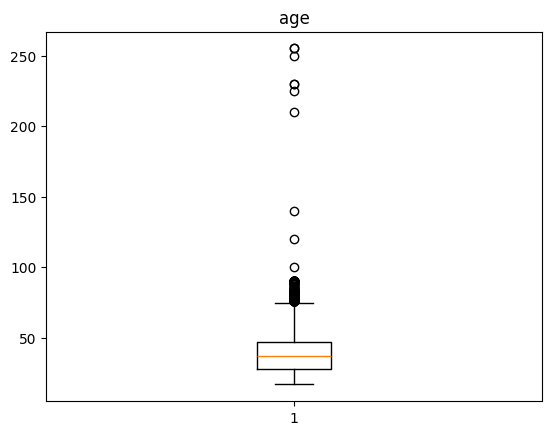

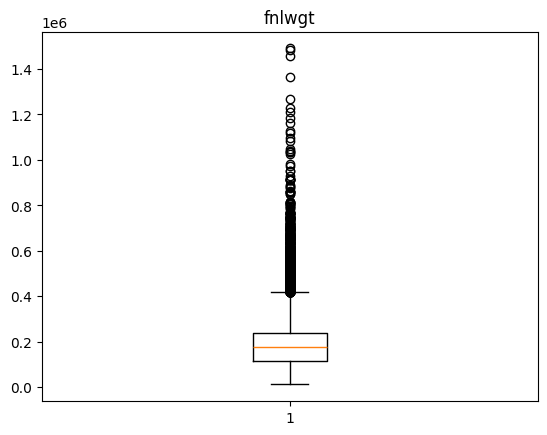

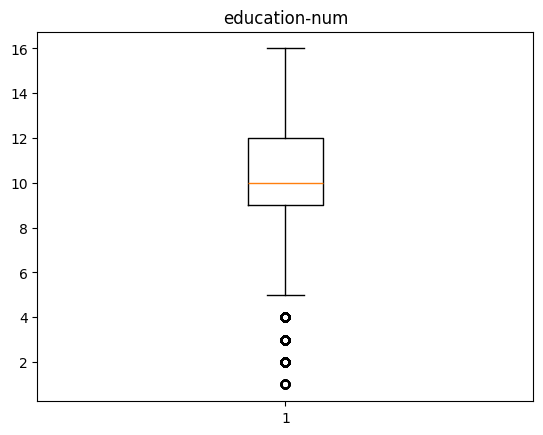

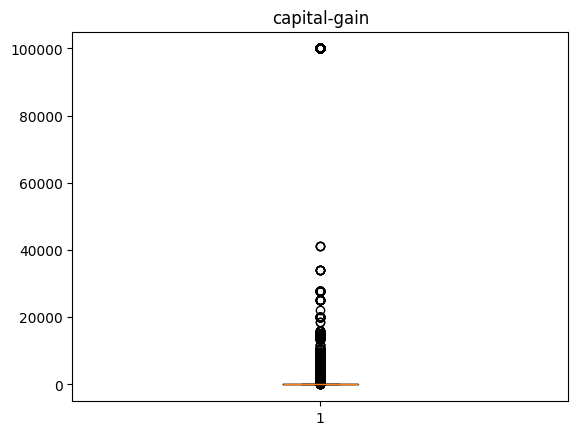

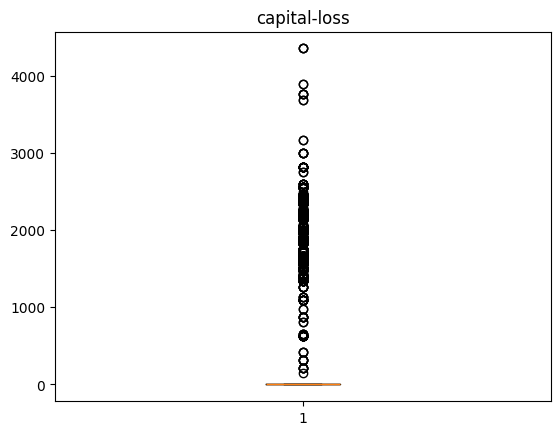

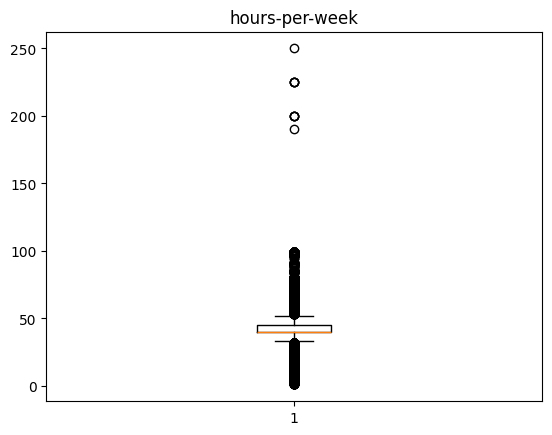

In [ ]:
for i in df.select_dtypes(include=['float64','int64']):
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

df['hours-per-week'] = winsorize(df['hours-per-week'],limits=(0,0.05))
df['capital-gain'] = winsorize(df['capital-gain'],limits=(0,0.05))
df['education-num'] = winsorize(df['education-num'],limits=(0.05,0))
df['age'] = winsorize(df['age'],limits=(0.,0.01))

df['capital-loss'] = np.log1p(df['capital-loss'])
df['fnlwgt'] = np.log1p(df['fnlwgt'])


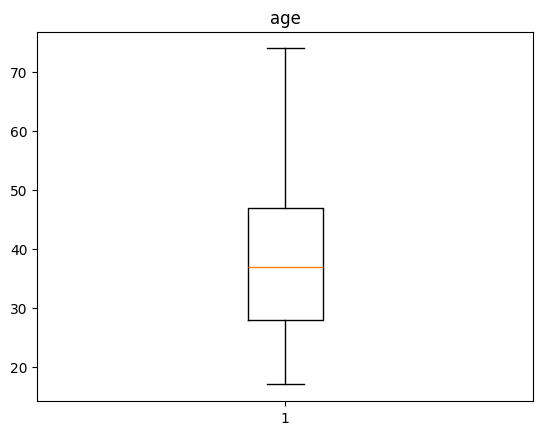

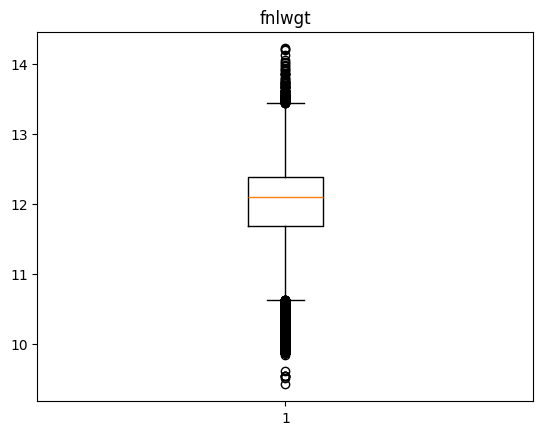

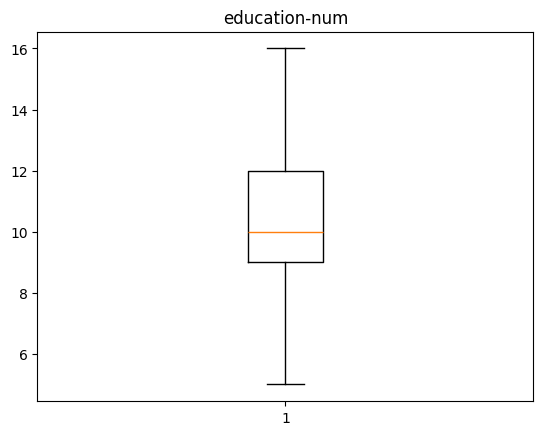

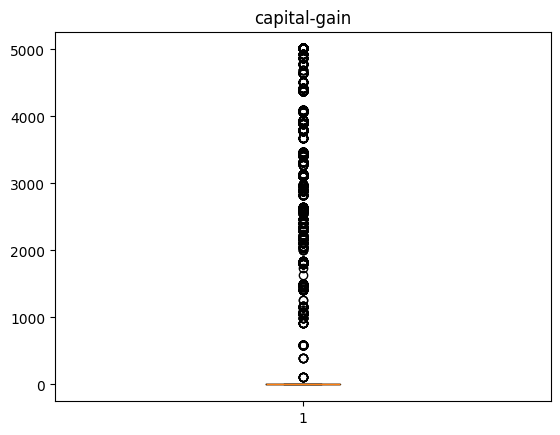

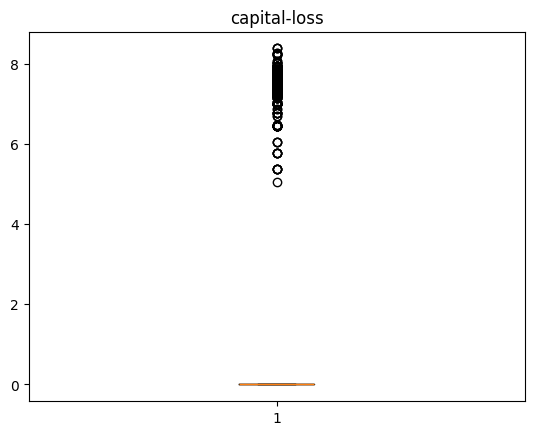

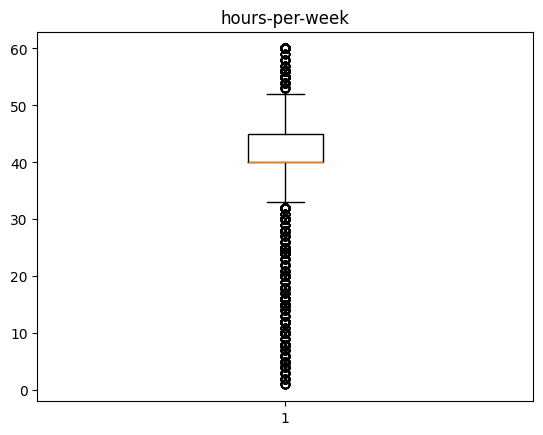

In [ ]:
for i in df.select_dtypes(include=['float64','int64']):
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
df['age'].max()

np.float64(74.0)

In [ ]:
df1 = df.copy()

In [ ]:
le = LabelEncoder()
cat_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
df.dropna(subset=['income'], inplace=True)
df['income'] = df['income'].str.lower().str.replace('.', '', regex=False)
income_order = [['<=50k', '>50k']]

oen = OrdinalEncoder(categories=income_order)
df['income'] = oen.fit_transform(df[['income']])

In [ ]:
# for frequency encoding

cat_col = ['workclass','education','marital-status','occupation','relationship','race','native-country']

In [ ]:
for i in cat_col:
  freq = df[i].value_counts()
  df[i] = df[i].map(freq)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'income'}>, <Axes: >]], dtype=object)

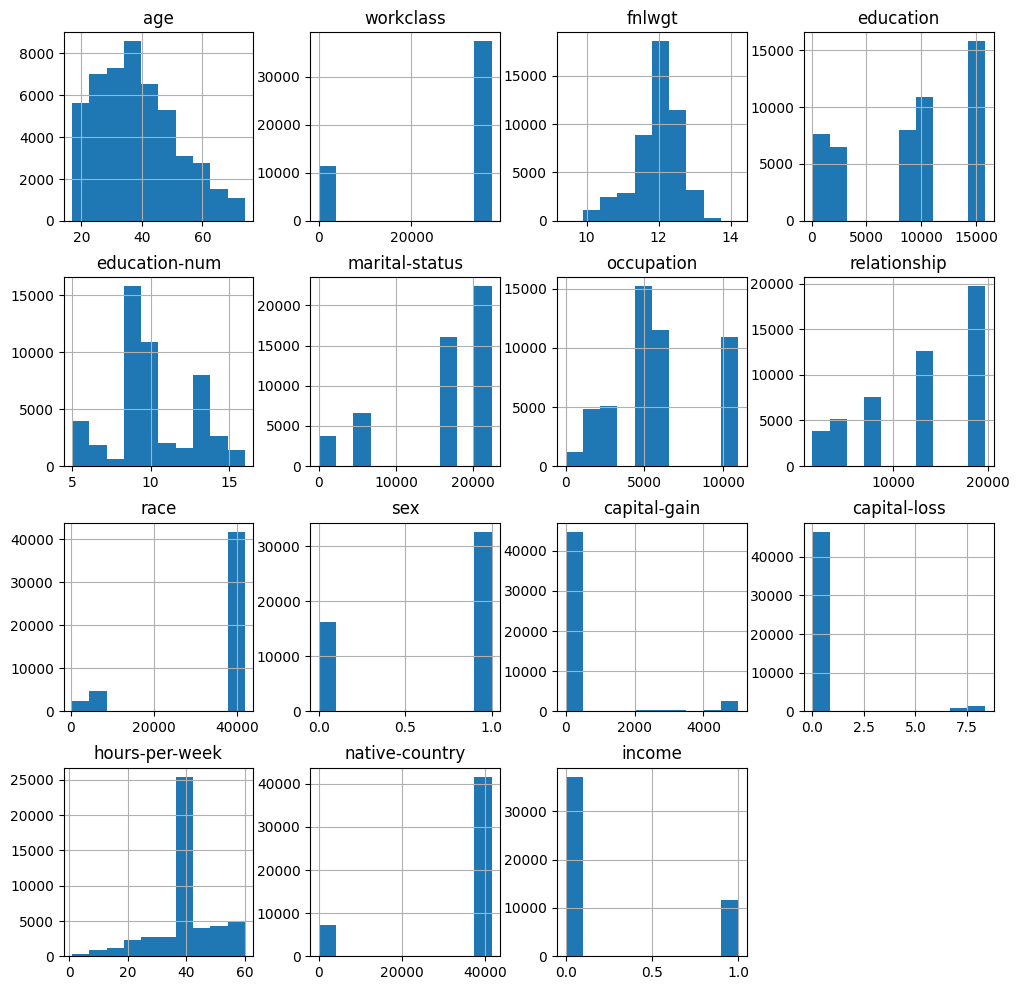

In [ ]:
df.hist(figsize = (12,12))

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
"""from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
s = ['age', 'workclass', 'fnlwgt', 'education','education-num',
       'marital-status', 'occupation', 'relationship', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
       ]
df[s]=scale.fit_transform(df[s])"""

"from sklearn.preprocessing import MinMaxScaler\n\nscale = MinMaxScaler()\ns = ['age', 'workclass', 'fnlwgt', 'education','education-num',\n       'marital-status', 'occupation', 'relationship', 'race',\n       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'\n       ]\ndf[s]=scale.fit_transform(df[s])"

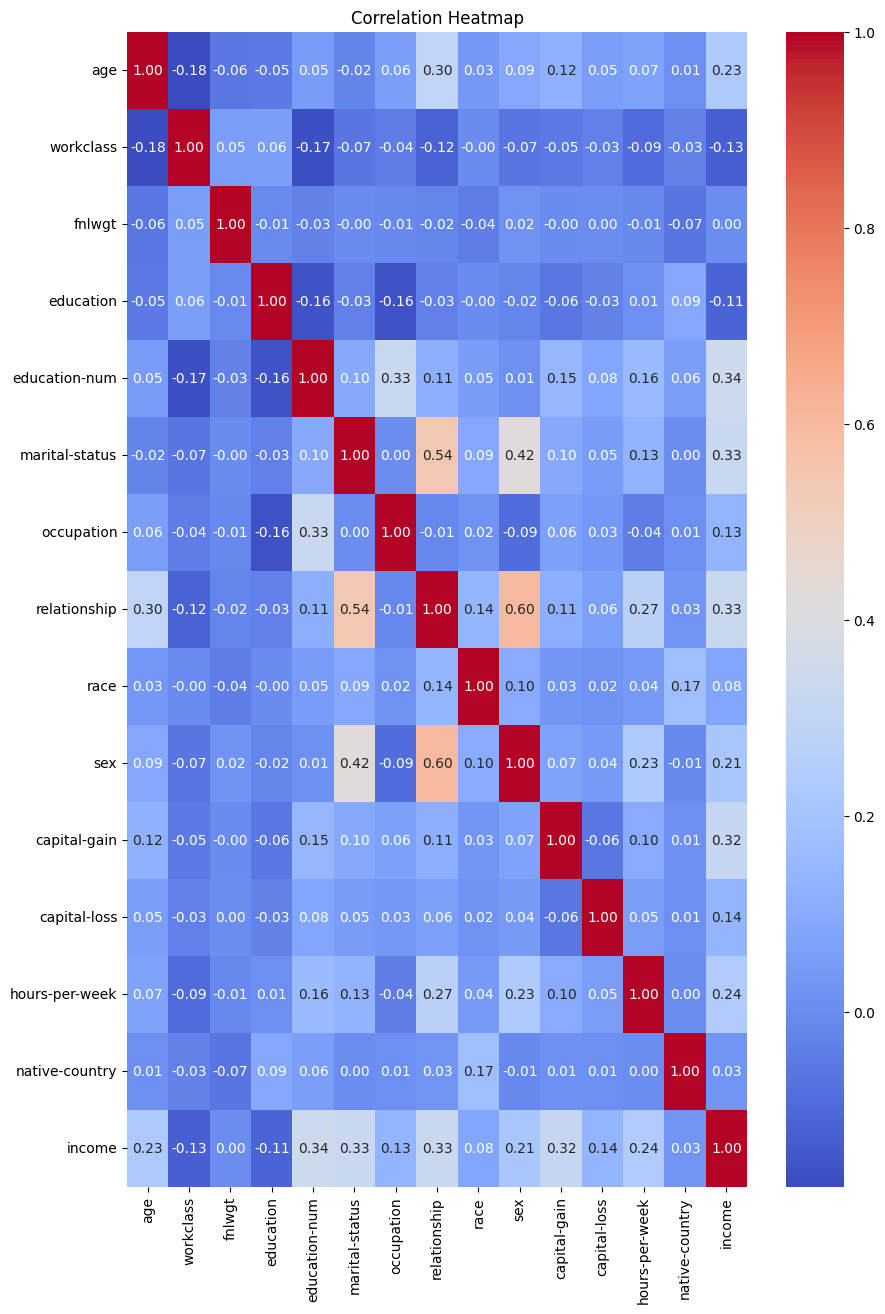

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# K-mean

In [ ]:
x = df[['age', 'workclass', 'fnlwgt', 'education',
       'marital-status', 'occupation', 'relationship', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

scale = MinMaxScaler()
x = scale.fit_transform(x)

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[48695.50838544108,
 42811.71818593689,
 36630.32720570883,
 31636.359852740687,
 30011.182076306828,
 27722.85066493894,
 26263.54983370271,
 25405.696574203932,
 24385.91209001944,
 23397.871361886828]

Text(0.5, 0, 'number of cluster')

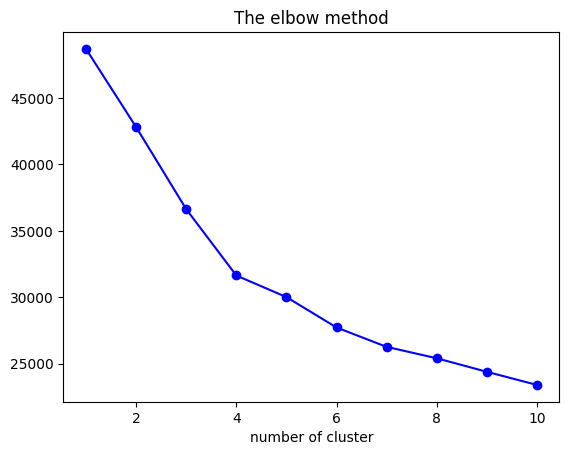

In [ ]:
plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(x)


labels = kmeans.fit_predict(x)

print(silhouette_score(x, labels))

0.1847876143479134


wcss=  [43958.425360130306, 36644.32160662528, 31897.867696219484, 26909.322724732232, 25251.967797773053, 23706.5794430144, 22633.48562149484, 21413.11075761007, 20107.208862842952, 18183.944461400664]


Text(0.5, 0, 'number of cluster')

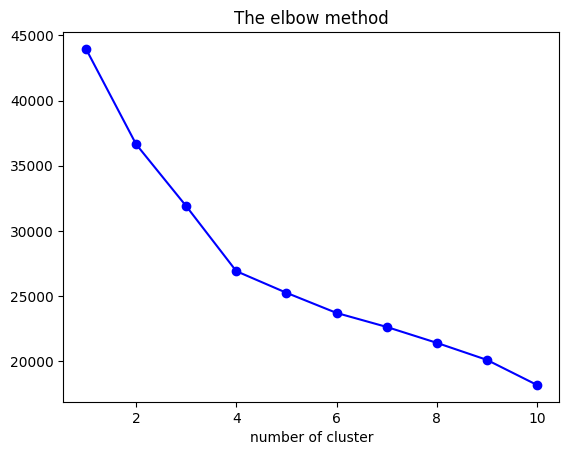

In [ ]:
y = df[['age', 'workclass', 'education',
       'marital-status', 'relationship', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

y = scale.fit_transform(y)
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
df3 = df.copy()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(y)
df3['cluster'] = kmeans.labels_

labels = kmeans.fit_predict(y)

print(silhouette_score(y, labels))

0.2192162874054112


wcss=  [40242.43861072664, 34369.479297624464, 28335.589046760586, 26032.124737502003, 24064.76115823911, 21376.59700426361, 20072.064535321562, 19325.544407676258, 17940.774906682476, 17400.058888658106]


Text(0.5, 0, 'number of cluster')

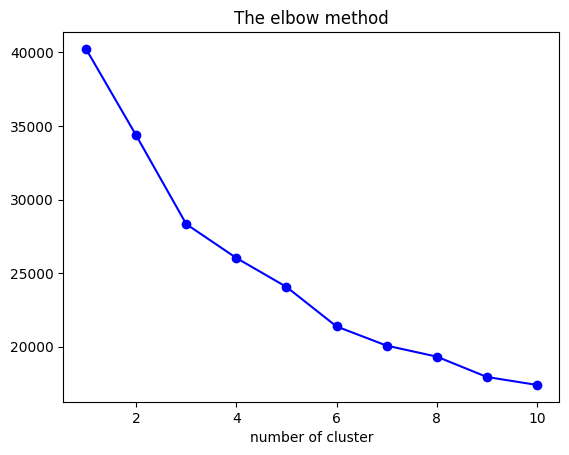

In [ ]:
z = df[['age', 'occupation', 'education',
       'marital-status', 'relationship', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
z = scale.fit_transform(z)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(z)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
df4 = df.copy()

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(z)


labels = kmeans.fit_predict(z)

print(silhouette_score(z, labels))

0.2123105761427788


wcss=  [38240.59951859315, 32365.026773801543, 25651.175851176667, 22648.87453154167, 20057.48194074238, 18740.999386344265, 17905.88999600088, 16263.496657318146, 14997.190889806696, 14347.442679476893]


Text(0.5, 0, 'number of cluster')

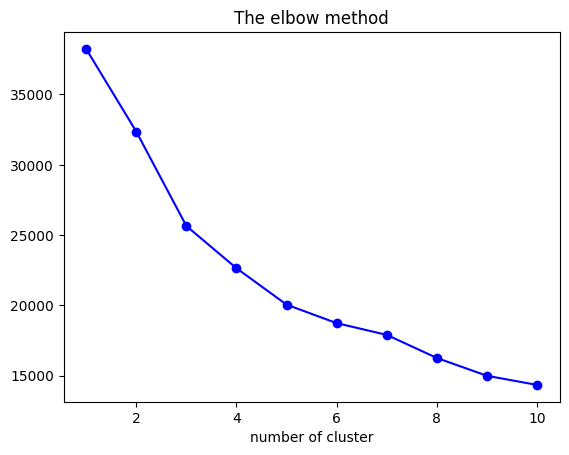

In [ ]:
y1 = df[['age', 'workclass', 'education',
       'marital-status', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y1 = scale.fit_transform(y1)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y1)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(y1)


labels = kmeans.fit_predict(y1)

print(silhouette_score(y1, labels))

0.3035641517547229


wcss=  [32556.004435059134, 24801.81722155316, 22788.79569166143, 17535.442534227863, 15831.395733000616, 14105.245512649362, 13227.403243503246, 12389.2964099729, 11742.876568543943, 10896.436217651826]


Text(0.5, 0, 'number of cluster')

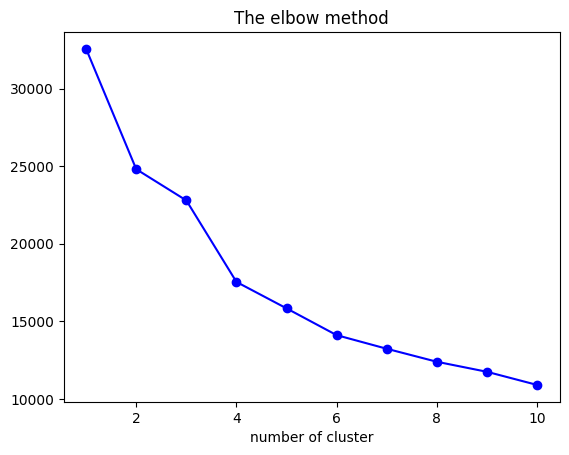

In [ ]:
y2 = df[['age', 'workclass', 'education',
       'marital-status', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week']]
y2 = scale.fit_transform(y2)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y2)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(y2)


labels = kmeans.fit_predict(y2)

print(silhouette_score(y2, labels))

0.3166743945168645


wcss=  [28001.93242830722, 20267.405736092674, 16532.540302886435, 14594.826077889775, 13625.99127006482, 10373.423792640517, 9618.011815598897, 9327.334079650476, 8340.514516177025, 7338.183112636869]


Text(0.5, 0, 'number of cluster')

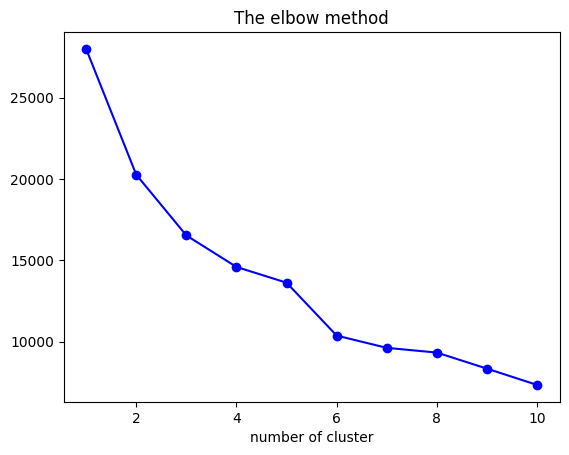

In [ ]:
y3 = df[['age', 'workclass', 'education', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week']]
y3 = scale.fit_transform(y3)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y3)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(y3)


labels = kmeans.fit_predict(y3)

print(silhouette_score(y3, labels))

0.368118473474951


wcss=  [21697.769494810836, 13985.571145895068, 9994.742572498133, 7949.457990237873, 6971.2695096917105, 5877.192429643241, 4646.880027157313, 4229.361612198267, 4056.573291492123, 3832.9662357429183]


Text(0.5, 0, 'number of cluster')

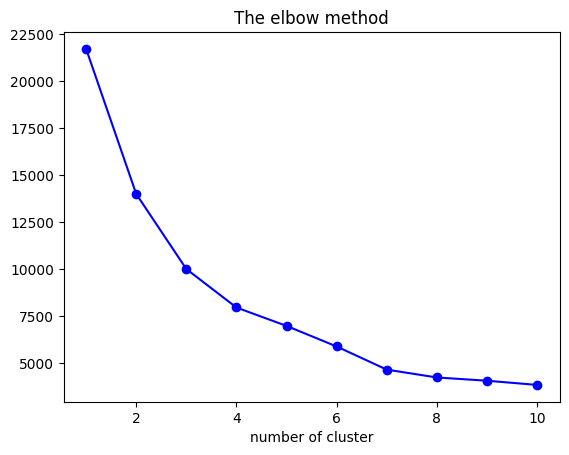

In [ ]:
y4 = df[['age', 'workclass', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week']]
y4 = scale.fit_transform(y4)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y4)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(y4)


labels = kmeans.fit_predict(y4)

print(silhouette_score(y4, labels))

0.5557099411384471


wcss=  [15194.66591217825, 10369.773173013573, 7900.693025459076, 6348.033145750353, 5167.362990914991, 4854.961306688253, 4037.5730706506693, 3727.3873308236066, 3337.1614539669076, 3056.999995725241]


Text(0.5, 0, 'number of cluster')

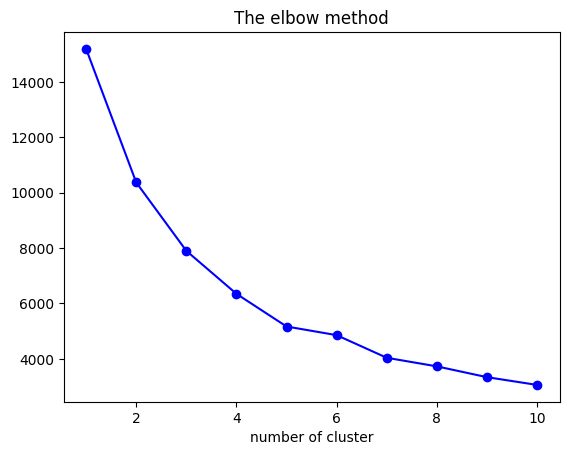

In [ ]:
y3 = df[['age', 'education',
       'capital-gain', 'capital-loss', 'hours-per-week']]
y3 = scale.fit_transform(y3)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y3)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(y3)


labels = kmeans.fit_predict(y3)

print(silhouette_score(y3, labels))

0.3997195968547048


wcss=  [16499.79607764917, 8787.736917082666, 7312.020936027797, 5376.250928501225, 4857.975039208613, 4504.165660040362, 3347.4651370764423, 2708.0018526951553, 2483.9506833631044, 2355.317715908932]


Text(0.5, 0, 'number of cluster')

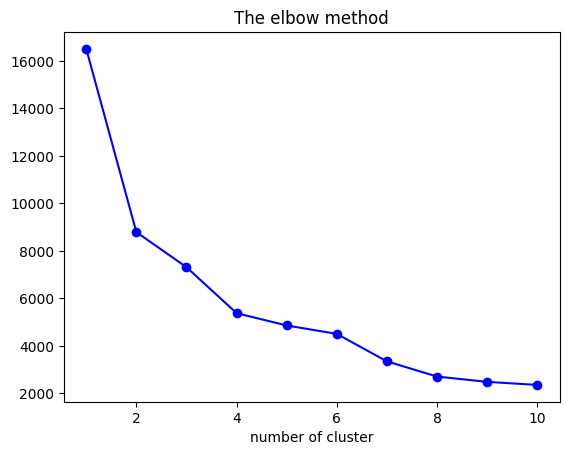

In [ ]:
y4 = df[['age', 'workclass',
       'capital-gain', 'capital-loss', 'hours-per-week']]
y4 = scale.fit_transform(y4)
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y4)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(y4)


labels = kmeans.fit_predict(y4)

print(silhouette_score(y4, labels))

0.5606194846882219


wcss=  [27319.74006241137, 16337.902773824695, 10906.310956571902, 9700.598587685294, 7464.668177506443, 6364.810596037504, 5352.716654725238, 4999.9492668856665, 4435.867897000538, 4040.2597251809852]


Text(0.5, 0, 'number of cluster')

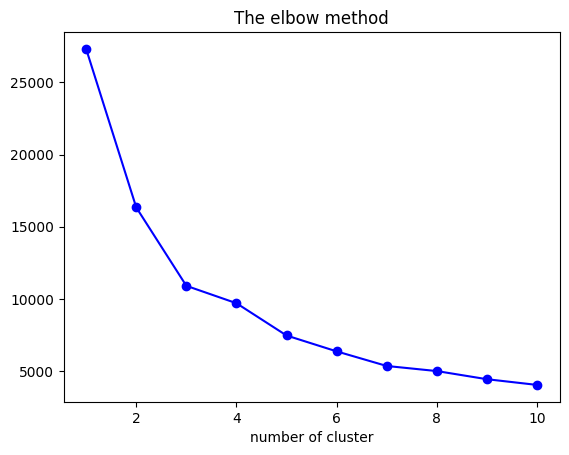

In [ ]:
y5 = df[['age', 'workclass','sex',
       'capital-gain', 'capital-loss', 'hours-per-week']]
y5 = scale.fit_transform(y5)
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y5)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(y5)


labels = kmeans.fit_predict(y5)

print(silhouette_score(y5, labels))

0.5681967022985398


wcss=  [25569.607413412326, 17810.62205487398, 9160.786824415885, 6925.089671215086, 5257.757233406568, 4489.056127909169, 4051.439449008748, 3969.858043168274, 3408.177945712958, 3264.9866838422267]


Text(0.5, 0, 'number of cluster')

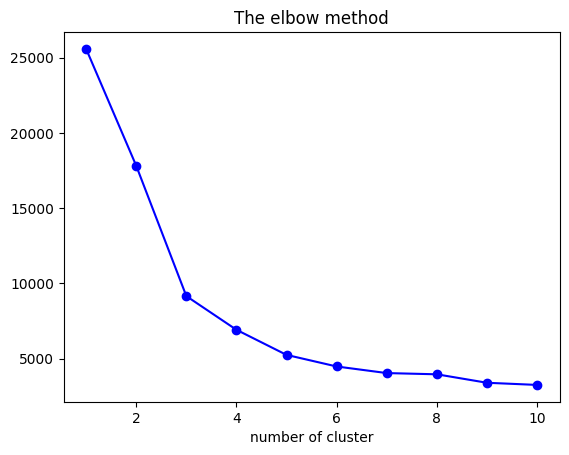

In [ ]:
y5 = df[['age', 'workclass','sex',
       'capital-gain', 'hours-per-week']]
y5 = scale.fit_transform(y5)
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y5)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(y5)


labels = kmeans.fit_predict(y5)

print(silhouette_score(y5, labels))

0.624343879690078


wcss=  [22937.00037660612, 11978.43635922827, 6605.753542326039, 4909.440624158956, 2746.793855186601, 2193.6767835008886, 1891.8911040877683, 1640.3152284455252, 1245.198970779367, 948.1731212924042]


Text(0.5, 0, 'number of cluster')

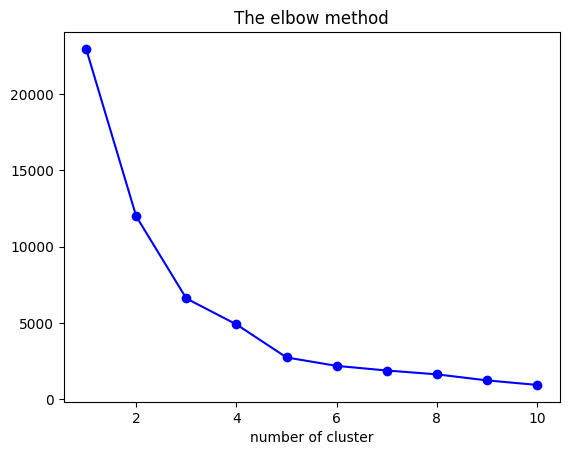

In [ ]:
y5 = df[['sex', 'workclass',
       'capital-gain', 'hours-per-week']]
y5 = scale.fit_transform(y5)
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y5)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(y5)

df4['cluster'] = kmeans.labels_
labels = kmeans.fit_predict(y5)

print(silhouette_score(y5, labels))

0.7679904385641925


wcss=  [14749.663428650241, 7039.496739331386, 5564.663390225358, 3646.9931353610436, 3152.6708701972093, 2950.104694944839, 2306.52018051353, 2002.544139228657, 1668.1585186912002, 1480.6338854992073]


Text(0.5, 0, 'number of cluster')

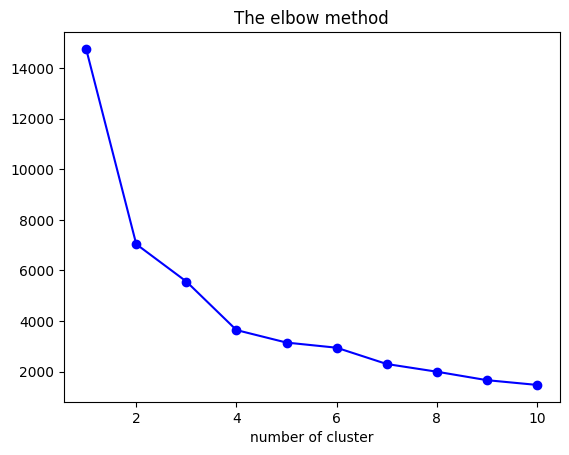

In [ ]:
y6 = df[['age', 'workclass',
       'capital-gain', 'hours-per-week']]
y6 = scale.fit_transform(y6)
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(y6)
  wcss.append(kmeans.inertia_)

print('wcss= ',wcss)

plt.plot(range(1,11),wcss,color='blue',marker='o')
plt.title('The elbow method')
plt.xlabel('number of cluster')

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(y6)

labels = kmeans.fit_predict(y6)

print(silhouette_score(y6, labels))

0.5951512063921492


In [ ]:
df4.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'cluster'],
      dtype='object')

In [ ]:
df4['cluster'].value_counts()

,count
cluster,
0,22391
1,13029
2,7550
4,3156
3,2700


In [ ]:
cluster_summary = df4.groupby('cluster')[[
       'capital-gain', 'hours-per-week']].mean()
cluster_summary

,capital-gain,hours-per-week
cluster,,
0,18.662856,40.941539
1,197.364878,35.913040
2,60.276026,42.823046
3,4680.324444,44.811111
4,324.203422,38.090304


In [ ]:
df4.groupby('cluster')[['workclass','sex']].agg(lambda x: x.mode()[0])

,workclass,sex
cluster,,
0,37329,1
1,37329,0
2,3649,1
3,37329,1
4,2973,0


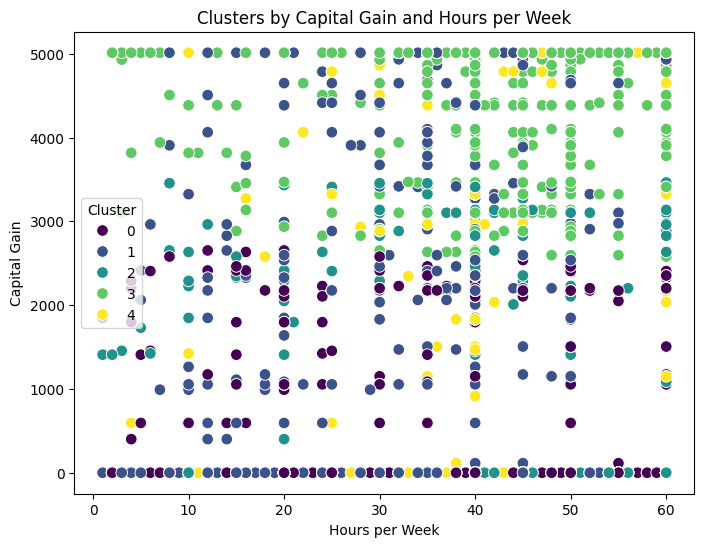

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df4,
    x='hours-per-week',
    y='capital-gain',
    hue='cluster',
    palette='viridis',
    s=70
)
plt.title('Clusters by Capital Gain and Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Capital Gain')
plt.legend(title='Cluster')
plt.show()

In [ ]:
new_customer = np.array([[1,1877,2174,40]])
new_scaled = scale.transform(new_customer)
print(new_scaled)
cluster_label = kmeans.predict(new_scaled)
cluster_label

[[-0.28070175  0.05005359  0.43367245  0.66101695]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

# Agglomerative clustering

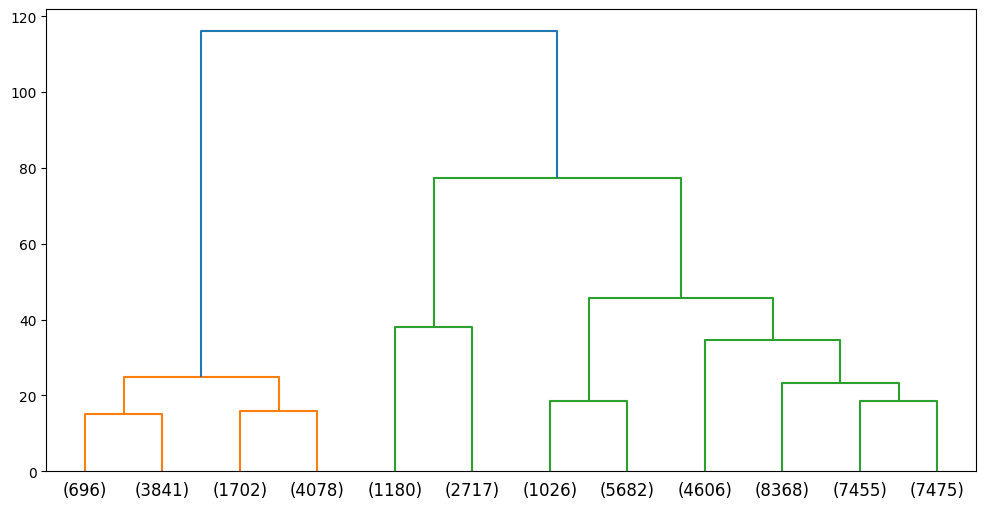

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

mergings = linkage(y6,method='ward')

plt.figure(figsize=(12,6))
#plt.axhline(y=200,ls='--')
dendrogram(mergings, truncate_mode='lastp', p=12)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_hc = AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='ward')
new_cluster_label = agg_hc.fit_predict(y6)

print(silhouette_score(y6,new_cluster_label))

0.6231564467153696


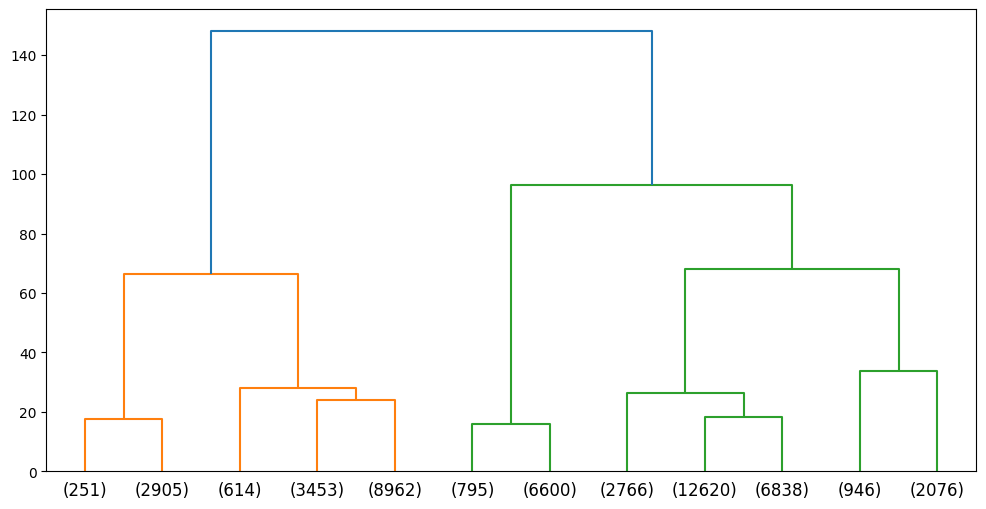

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

mergings = linkage(y5,method='ward')

plt.figure(figsize=(12,6))
#plt.axhline(y=200,ls='--')
dendrogram(mergings, truncate_mode='lastp', p=12)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_hc = AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='ward')
new_cluster_label1 = agg_hc.fit_predict(y5)

print(silhouette_score(y5,new_cluster_label))

0.4959593348932864


In [ ]:
df4['agg_hc_cluster']=new_cluster_label
df4.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster,agg_hc_cluster
0,39.0,1877,11.258253,8021,13,16105,5328,12572,41747,1,2174,0.0,40.0,3259,0.0,2,2
1,50.0,3649,11.330348,8021,13,22377,5770,19714,41747,1,0,0.0,13.0,41610,0.0,2,1
2,38.0,37329,12.281398,15780,9,6631,1976,12572,41747,1,0,0.0,40.0,41610,0.0,0,0
3,53.0,37329,12.366157,1812,7,22377,1976,19714,4685,1,0,0.0,40.0,41610,0.0,0,0
4,28.0,37329,12.732013,8021,13,22377,10957,2331,4685,0,0,0.0,40.0,132,0.0,1,0


In [ ]:
df4['agg_hc_cluster'].value_counts()

,count
agg_hc_cluster,
0,34612
1,10317
2,3897


In [ ]:
cluster_summary = df4.groupby('agg_hc_cluster')[['age',
       'capital-gain', 'hours-per-week']].mean()
cluster_summary

,age,capital-gain,hours-per-week
agg_hc_cluster,,,
0,36.769069,2.279672,39.090980
1,42.414752,5.963265,41.410197
2,43.777008,4353.109058,43.342058


In [ ]:
df4.groupby('agg_hc_cluster')[['workclass']].agg(lambda x: x.mode()[0])

,workclass
agg_hc_cluster,
0,37329
1,3649
2,37329


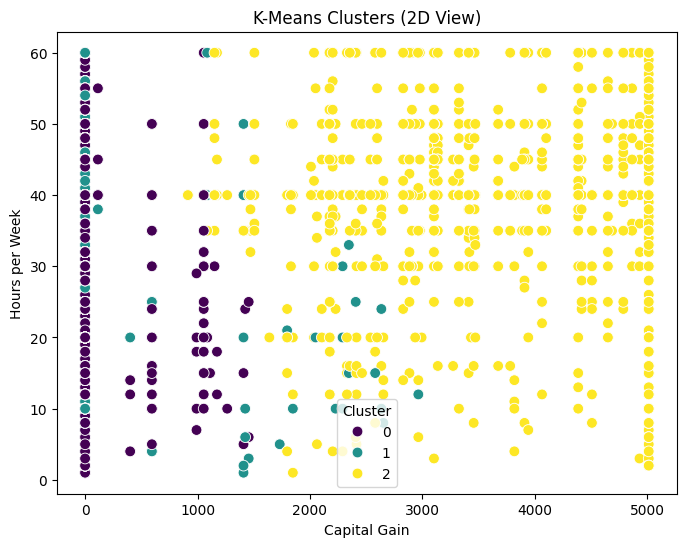

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='capital-gain',
    y='hours-per-week',
    hue='agg_hc_cluster',
    data=df4,
    palette='viridis',
    s=60
)
plt.title('K-Means Clusters (2D View)')
plt.xlabel('Capital Gain')
plt.ylabel('Hours per Week')
plt.legend(title='Cluster')
plt.show()


## Cluster Interpretation

## for k mean
The clustering results reveal five distinct socioeconomic groups. Cluster 0 represents regular male workers with average working hours and minimal capital gains, indicating stable mid-level jobs. Cluster 1 includes low-earning female employees working fewer hours with low gains, possibly part-time or lower-income roles. Cluster 2 consists of hard-working males with long hours but low returns. Cluster 3 identifies high-income male professionals who work longer hours and earn the highest capital gains, reflecting managerial or investor roles. Finally, Cluster 4 groups moderate-income female employees with average hours and moderate capital gains, representing middle-level earners.

### for Agglomerative clustering
The Agglomerative clustering divided individuals into three meaningful socioeconomic groups. Cluster 0 represents mid-aged employees working around 39 hours per week with negligible capital gains, indicating steady wage earners in standard occupations. Cluster 1 includes slightly older workers with modest capital gains and average working hours, possibly mid-level professionals with some investment income. Cluster 2 stands out as high-income individuals, characterized by very high capital gains and longer working hours, suggesting entrepreneurs or top-level executives.